In [1]:
import atlite
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
from rasterio.plot import show
from atlite.gis import shape_availability, ExclusionContainer

C:\Users\javedm\AppData\Local\Temp\ipykernel_6132\4247738242.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


<Axes: >

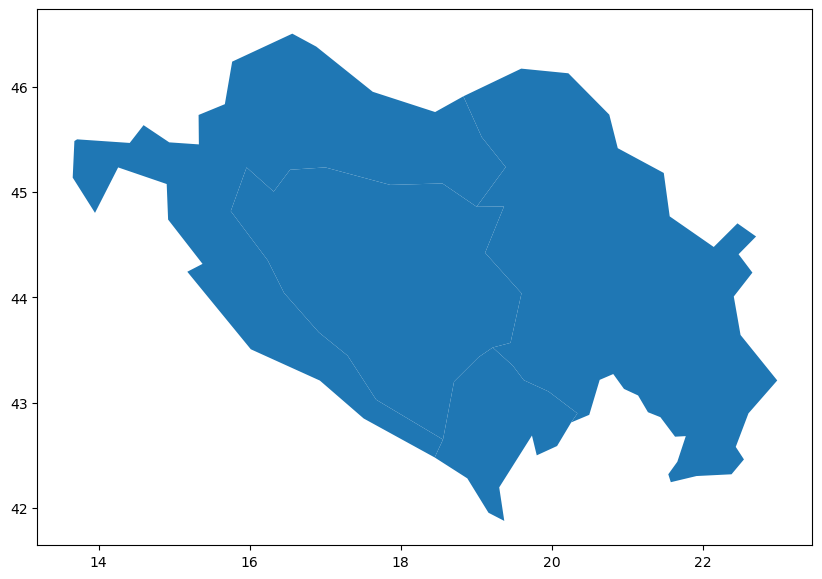

In [8]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries = ["Serbia", "Croatia", "Bosnia and Herz.", "Montenegro"]
shapes = world[world.name.isin(countries)].set_index("name")
shapes.plot(figsize=(10,7))

In [ ]:
bounds = shapes.cascaded_union.buffer(1).bounds
cutout = atlite.Cutout(
    "balkans", module="era5", bounds=bounds, time=slice("2013-01-01", "2013-01-02")
)


<Axes: >

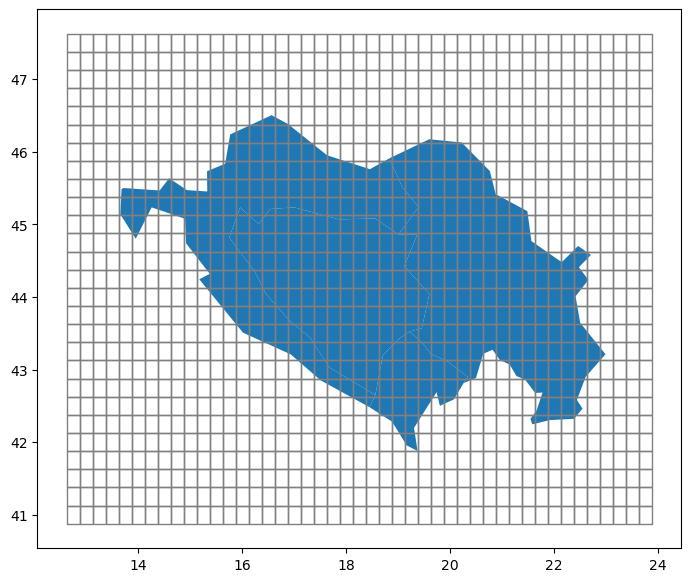

In [21]:
plt.rc("figure", figsize=[10,7])
fig, ax = plt.subplots()
shapes.plot(ax=ax)
cutout.grid.plot(ax=ax, edgecolor='grey', color='None')

In [23]:
CORINE = "corine.tif"
excluder = ExclusionContainer()
excluder.add_raster(CORINE, codes=range(20))

In [24]:
croatia = shapes.loc[["Croatia"]].geometry.to_crs(excluder.crs)

In [25]:
masked, transform = excluder.compute_shape_availability(croatia)

In [26]:
eligible_share = masked.sum()*excluder.res**2 / croatia.geometry.item().area


C:\Users\javedm\AppData\Local\Temp\ipykernel_6132\2639344182.py:1: RuntimeWarning: overflow encountered in scalar multiply
  eligible_share = masked.sum()*excluder.res**2 / croatia.geometry.item().area


In [27]:
print(f"The eligibility share is: {eligible_share:.2%}")

The eligibility share is: -3.13%


c:\Users\javedm\AppData\Local\miniconda3\envs\atlite\Lib\site-packages\atlite\gis.py:657: RuntimeWarning: overflow encountered in scalar multiply
  eligible_share = masked.sum() * self.res**2 / geometry.area.sum()


<Axes: title={'center': 'Eligible area (green) -3.13%'}>

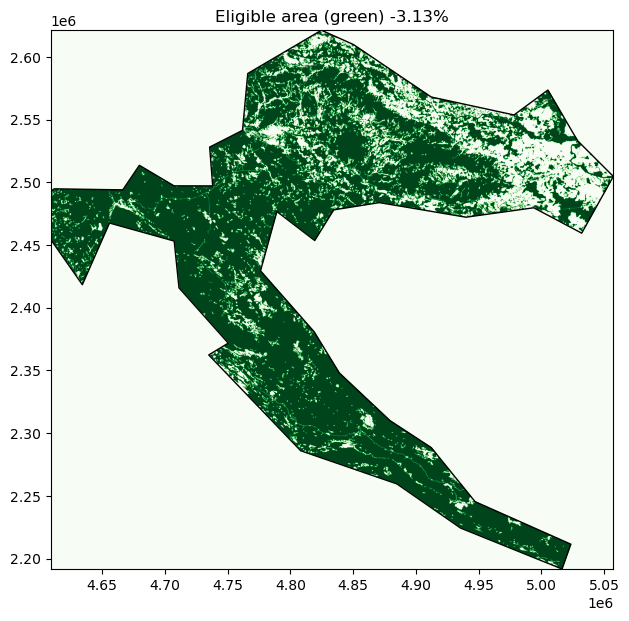

In [30]:
fig, ax = plt.subplots()
excluder.plot_shape_availability(croatia)

In [25]:
import atlite

import logging

logging.basicConfig(level=logging.INFO)


examplecutout = atlite.Cutout(
    path="c:/Users/javedm/planets/tiff_file_read/europe_2010.nc",
    module = 'era5',
    x = slice(-10.3354, 32.9297),
    y = slice(52.36, 82.7991),
    time = slice('2010-01-01', '2010-12-31'),   
)




c:\Users\javedm\AppData\Local\miniconda3\envs\atlite\Lib\site-packages\atlite\cutout.py:190: UserWarning: Arguments module, x, y, time are ignored, since cutout is already built.
  warn(


In [ ]:
examplecutout.prepare()